<a href="https://colab.research.google.com/github/lXmetra/curso-estadistica-multivariante/blob/master/T2companies79.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import scipy as sc
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves


# Subir el archivo
df=pd.read_csv('./companies79.csv')
df.head()



,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8
0,1,BellAtlantic,19788,9084,10636,1092.9,2576.8,79.4,Communication
1,2,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication
2,3,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy
3,4,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy
4,5,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy


In [ ]:
Zf=df.drop_duplicates()
Zf.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8
0,1,BellAtlantic,19788,9084,10636,1092.9,2576.8,79.4,Communication
1,2,ContinentalTelecom,5074,2557,1892,239.9,578.3,21.9,Communication
2,3,AmericanElectricPower,13621,4848,4572,485.0,898.9,23.4,Energy
3,4,BrooklynUnionGas,1117,1038,478,59.7,91.7,3.8,Energy
4,5,CentralIllinoisPublicService,1633,701,679,74.3,135.9,2.8,Energy


In [ ]:
# Obtener información sobre missing values, variables sobrantes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  79 non-null     int64  
 1   V1          79 non-null     object 
 2   V2          79 non-null     int64  
 3   V3          79 non-null     int64  
 4   V4          79 non-null     int64  
 5   V5          79 non-null     float64
 6   V6          79 non-null     float64
 7   V7          79 non-null     float64
 8   V8          79 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 5.7+ KB


In [ ]:
df['V8'].value_counts()

Finance           17
Energy            15
Manufacturing     10
Retail            10
HiTech             8
Other              7
Transportation     6
Medical            4
Communication      2
Name: V8, dtype: int64

In [ ]:
# Vamos a eliminar las variables 'Unnamed: 0', 'V1' y 'V8'
df.drop('V1',axis=1,inplace=True)
df.drop('V8',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
Xf=df
Xf.head()

,V2,V3,V4,V5,V6,V7
0,19788,9084,10636,1092.9,2576.8,79.4
1,5074,2557,1892,239.9,578.3,21.9
2,13621,4848,4572,485.0,898.9,23.4
3,1117,1038,478,59.7,91.7,3.8
4,1633,701,679,74.3,135.9,2.8


In [ ]:
# elimino solo la columna "V1"
Zf.drop('V1',axis=1,inplace=True)
Zf.drop('Unnamed: 0',axis=1,inplace=True)
Zf.head()

,V2,V3,V4,V5,V6,V7,V8
0,19788,9084,10636,1092.9,2576.8,79.4,Communication
1,5074,2557,1892,239.9,578.3,21.9,Communication
2,13621,4848,4572,485.0,898.9,23.4,Energy
3,1117,1038,478,59.7,91.7,3.8,Energy
4,1633,701,679,74.3,135.9,2.8,Energy


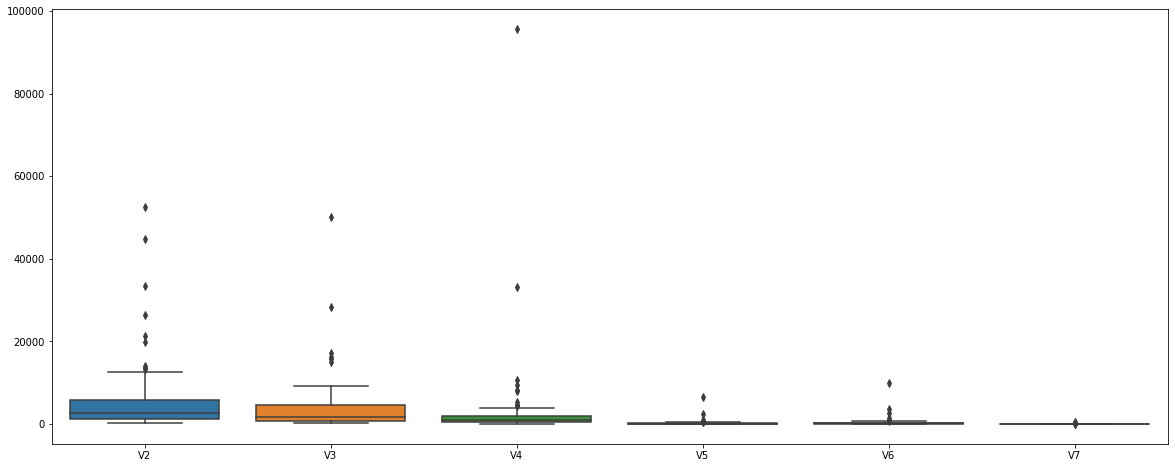

In [ ]:
# Boxplots
plt.figure(figsize=(20,8))
sns.boxplot( data = Xf )
plt.show()
# Como se puede observar tenemos diferentes rangos y esto afecta la visualización

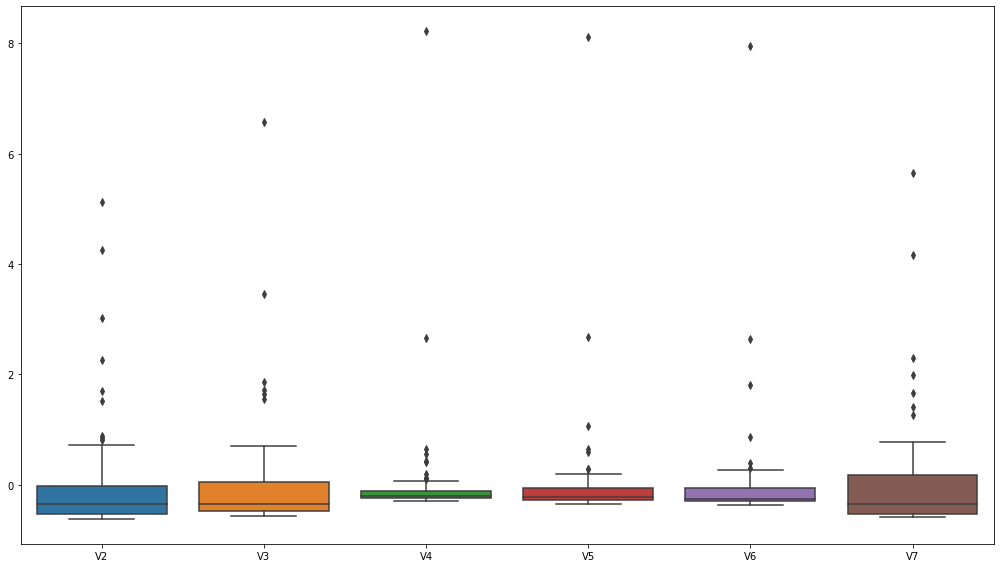

In [ ]:
# Estandarizamos para tener variables con los mismos rangos

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(Xf.values)
Xf_scaled = pd.DataFrame(scaled_features, index=Xf.index, columns=Xf.columns)

# Boxplots con variables estandarizadas
plt.figure(figsize=(14,8))
sns.boxplot( data = Xf_scaled )

plt.tight_layout()

(79, 6)


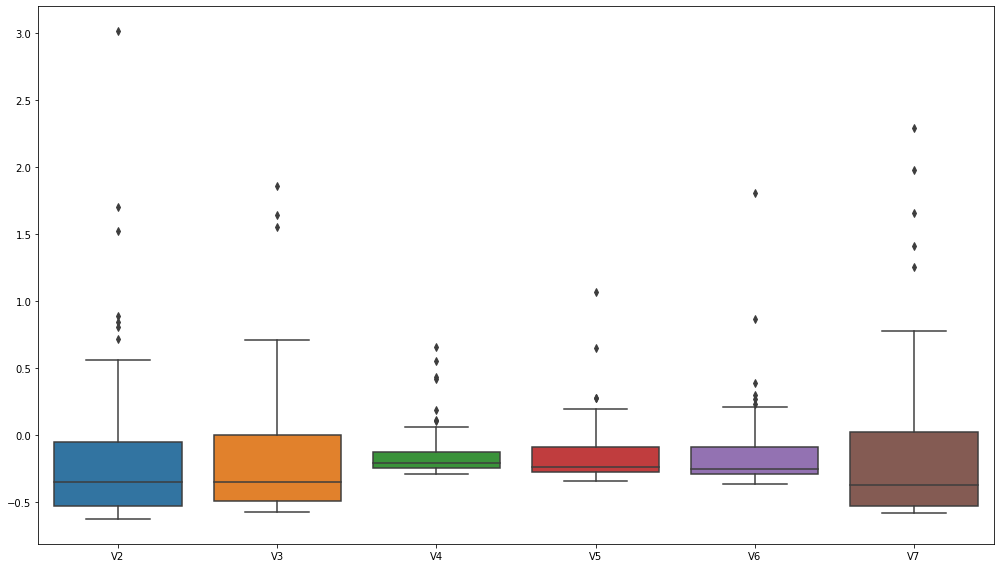

In [ ]:
# Eliminando atípicos
Xf_clean=Xf_scaled[Xf_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
print(df_features_clean.shape)

plt.figure(figsize=(14,8))
sns.boxplot( data = Xf_clean )
plt.tight_layout()

In [ ]:
y = Zf[Zf.columns[6]]
y

0      Communication
1      Communication
2             Energy
3             Energy
4             Energy
           ...      
74    Transportation
75    Transportation
76    Transportation
77    Transportation
78    Transportation
Name: V8, Length: 79, dtype: object

In [ ]:
Zf_features= Zf[Zf.columns[0:6]] # Escogemos de zf las columnas numericas 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(Zf_features.values)
Zf_features_scaled = pd.DataFrame(scaled_features, index=Zf_features.index, columns=Zf_features.columns)
Zf_features_clean=Zf_features_scaled[Zf_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3

Zf_features_y_clean = pd.concat([Zf_features_clean, y], axis=1)                                                              
Zf_features_clean = Zf_features_y_clean.iloc[:,0:30]
Zf_y = Zf_features_y_clean.iloc[:,30]



plt.figure(figsize=(14,8))
Zf_features_y_clean.boxplot(by="V8", figsize=(24, 12))
plt.xticks(rotation=90)  
plt.tight_layout()                                                              

SyntaxError: ignored

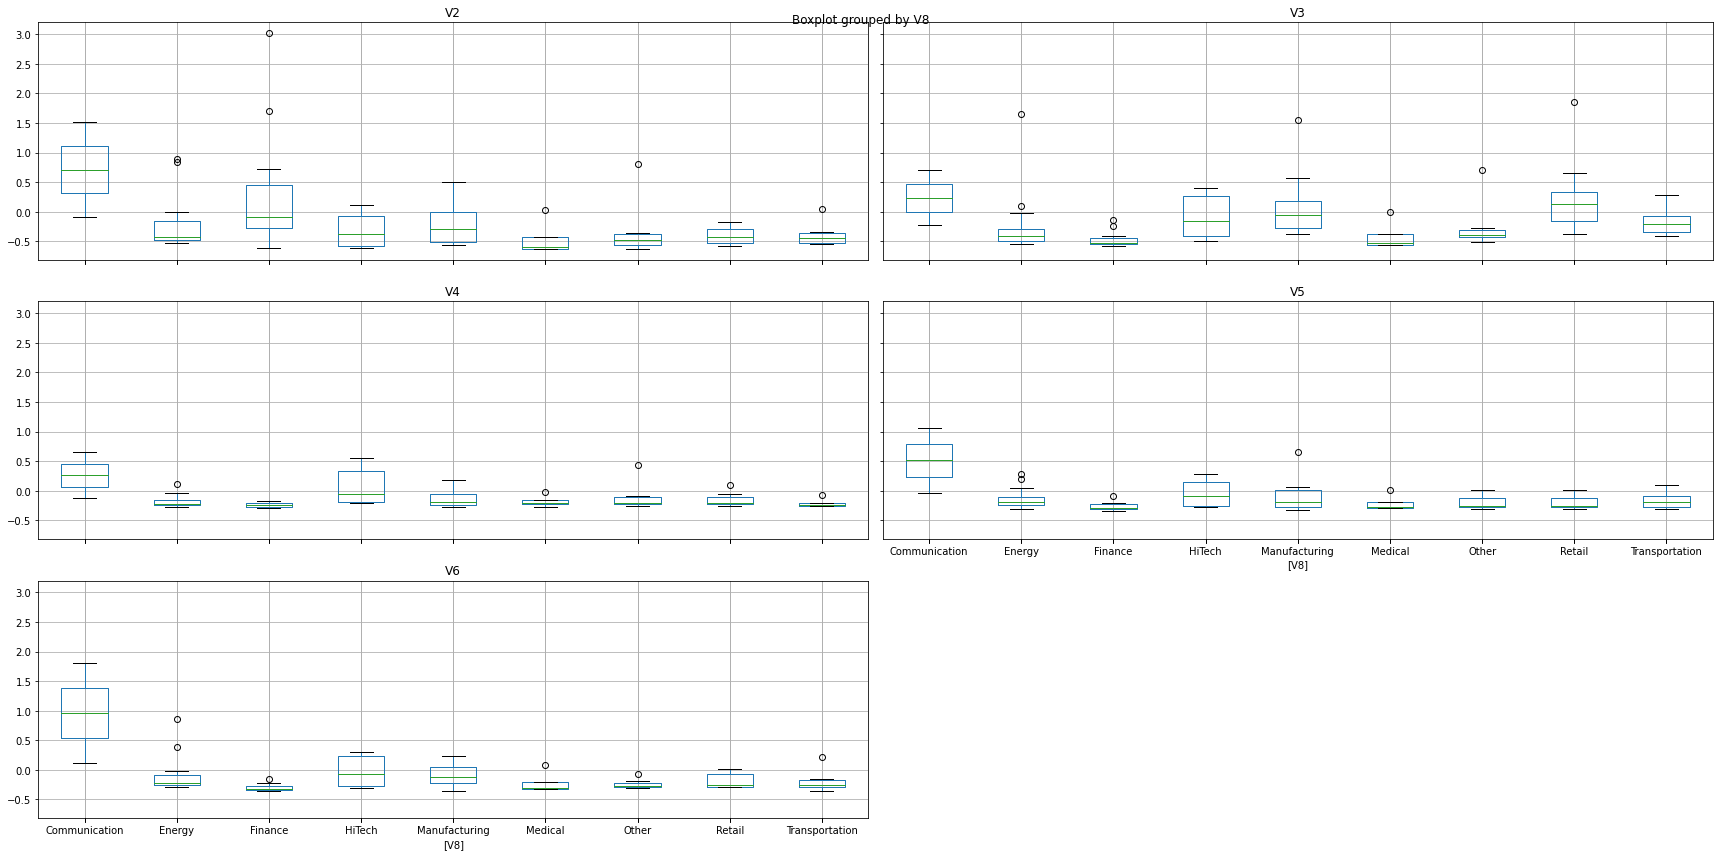

In [ ]:
#Boxplots para cada variable divididos por grupos en Sector

Zf_features= Zf[Zf.columns[0:6]] # Escogemos de zf las columnas numericas 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features =scaler.fit_transform(Zf_features.values)
Zf_features_scaled = pd.DataFrame(scaled_features, index=Zf_features.index, columns=Zf_features.columns)
Zf_features_clean=Zf_features_scaled[Zf_features_scaled.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]


Zf_features_y_clean.boxplot(by="V8", figsize=(24, 12))
plt.tight_layout()

In [ ]:
df_y.shape

(569,)

In [ ]:
# Convertir M a 1 y B a 0:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Vamos a dividir los datos en tres grupos
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


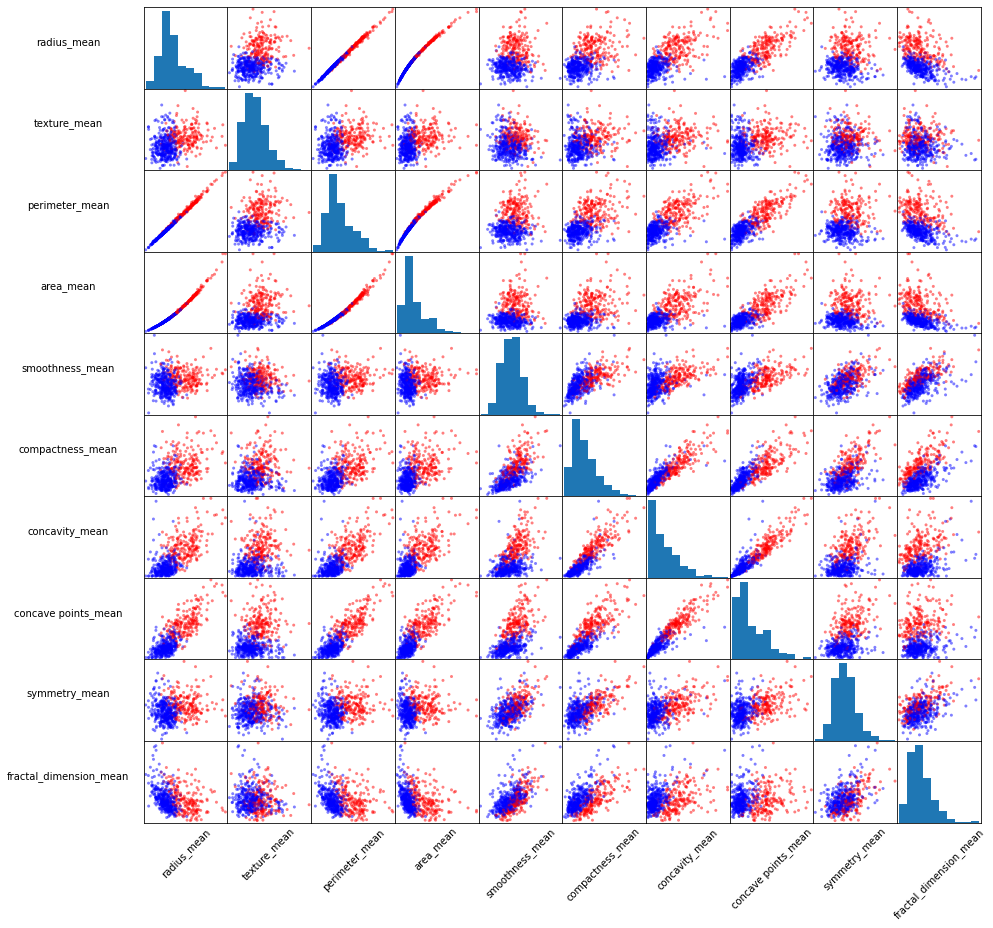

In [ ]:
from pandas.plotting import scatter_matrix
color_function = {0: "blue", 1: "red"} # rojo: Malign y azul: Benign
colors = df["diagnosis"].map(lambda x: color_function.get(x))

sm=scatter_matrix(df[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); # Solo para features_mean

# Cambiar orientacion de labels
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.9,0.5) for s in sm.reshape(-1)]
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

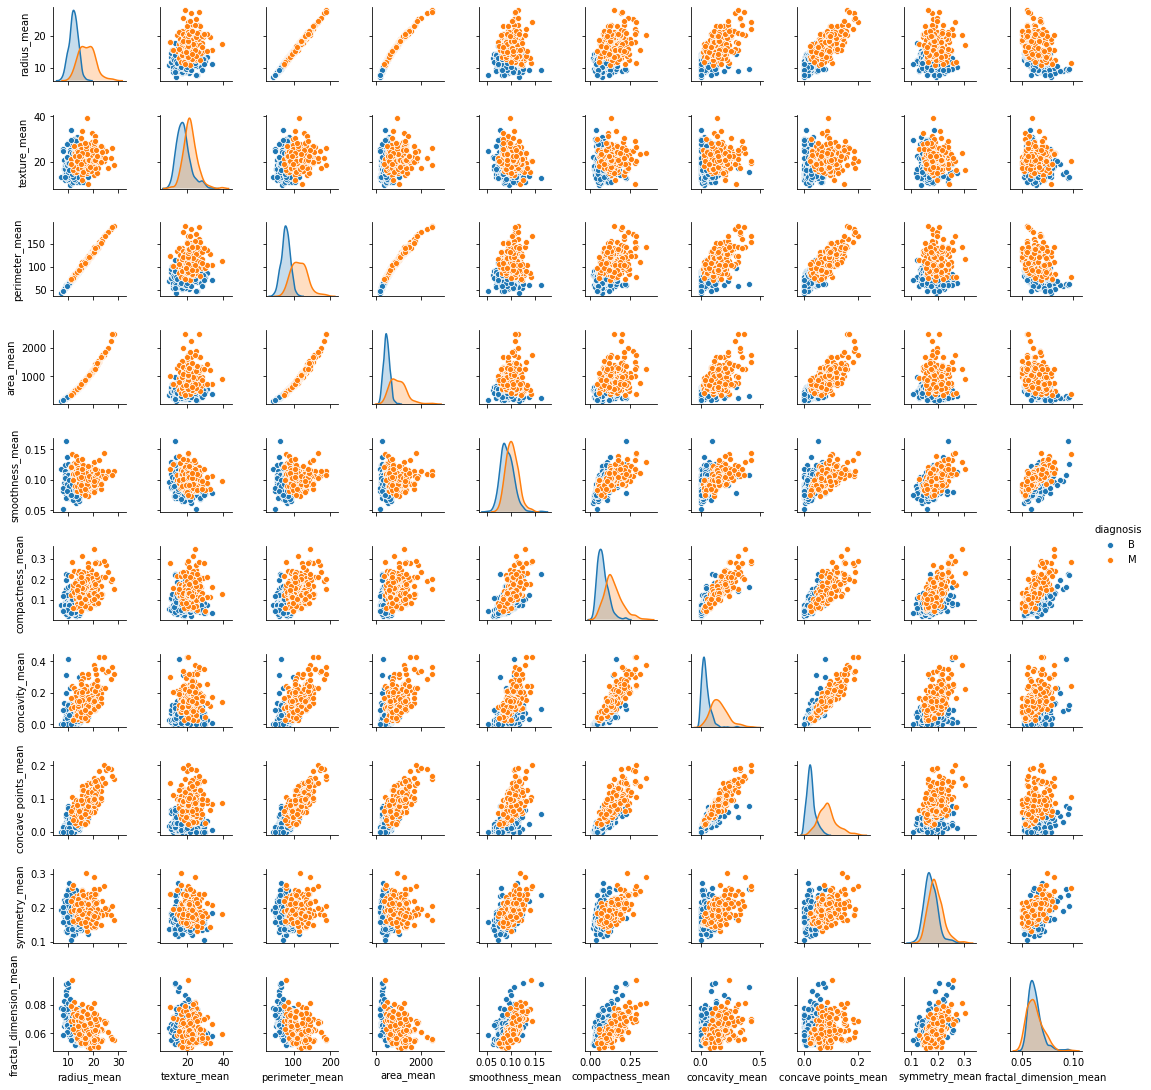

In [ ]:
# Con la libreria seaborn y si queremos que salgan kernel densities en vez de histogramas en la diagonal
sns.pairplot(  pd.concat([df_features[features_mean],y], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True),height=1.5)
# sns.pairplot(  pd.concat([df_features[features_se],y], axis=1),    hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True),height=1.5)
# sns.pairplot(  pd.concat([df_features[features_worst],df_y], axis=1), hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True),height=1.5)